In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pylab as plt

2022-06-22 17:12:09.837785: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-22 17:12:09.837851: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2022-06-22 17:12:13.824860: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-06-22 17:12:13.825216: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-06-22 17:12:13.825254: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


# fashoin MNIST dataset

this dataset includes 60.000 images for training and 10.000 images for validaton/testing .

In [2]:
fashion_mnist=keras.datasets.fashion_mnist
#spliting the dataset to train and test images
(train_images,train_lables),(test_images,test_lables)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 6s 1us/step


# undrestanding more the data 

In [3]:
train_images.shape

(60000, 28, 28)

the train lables are integers 0-9 represent fashion MNIST dataset

In [4]:
# class names
classes=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

Plot the first 5 images in the dataset.

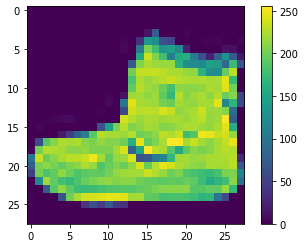

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# data preproccessing ... images preproccessing

In [6]:
train_images=train_images/255.0
test_images=test_images/255.0

# building the model

In [7]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
    ])

2022-06-22 17:13:42.372887: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-22 17:13:42.373375: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pc): /proc/driver/nvidia/version does not exist


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['acc'])

# training the model

In [10]:
model.fit(train_images,train_lables,epochs=10)

2022-06-22 17:13:47.509478: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.4935 - acc: 0.8272
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3715 - acc: 0.8677
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3383 - acc: 0.8787
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3119 - acc: 0.8868
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2933 - acc: 0.8925
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2798 - acc: 0.8967
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2661 - acc: 0.9007
Epoch 8/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2584 - acc: 0.9027
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2485 - acc: 0.9080
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2374 - acc: 0.9113


In [11]:
test_loss,test_acc=model.evaluate(test_images,test_lables,verbose=1)
print('test accuacy ',test_acc)

2022-06-22 17:16:12.194673: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 6ms/step - loss: 0.3339 - acc: 0.8821
test accuacy  0.882099986076355


In [12]:
predections=model.predict(test_images)

2022-06-22 17:16:19.268057: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 6ms/step


In [13]:
predections[0]

array([3.6027510e-07, 5.2355609e-09, 5.6104831e-08, 7.5142719e-09,
       6.1205304e-07, 4.1747750e-03, 3.4862458e-07, 2.0661162e-02,
       2.8100720e-07, 9.7516251e-01], dtype=float32)

In [14]:
np.argmax(predections[0])

9